In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np
from geofunctions import utils
import os

In [2]:
full_df = gpd.read_file("../data/to_map/geohash_work_home_stat_monthly.geojson")

In [3]:
full_df.head()

,geohash,num_homes,num_works,type,month,flag_good_month,geometry
0,swnt70p,0,1,Work,201901,False,"POLYGON ((34.67285 31.78207, 34.67285 31.78345..."
1,swnt72d,0,1,Work,201901,False,"POLYGON ((34.6756 31.78619, 34.6756 31.78757, ..."
2,swnt74z,1,0,Home,201901,False,"POLYGON ((34.68796 31.78207, 34.68796 31.78345..."
3,swnt75n,3,0,Home,201901,False,"POLYGON ((34.68933 31.7807, 34.68933 31.78207,..."
4,swnt75p,1,0,Home,201901,False,"POLYGON ((34.68933 31.78207, 34.68933 31.78345..."


In [4]:
gdf_employment = gpd.read_file(utils.get_path("raw","statistics","EMPLOYMENT/EMPLOYMENT.shp"))

In [5]:
gdf_employment.head()

,NAME,CITY,EMPLOYMENT,YEARMONTH,DUNAM,Shape_Leng,Shape_Area,geometry
0,אזור תעשייה מישור אדומיים,כפר אדומים,3700,202201,2371,6528.129982,2.370786e+06,"POLYGON ((231381.221 633911.298, 231430.345 63..."
1,פארק תעשיות אריאל מערב,מפעלי ברקן,2000,202201,792,4197.176270,7.924448e+05,"POLYGON ((211357.417 667079.561, 211477.469 66..."
2,אזור תעשייה ברקן,מפעלי ברקן,5875,202201,1014,10169.209892,1.013764e+06,"POLYGON ((210947.183 667663.114, 210964.051 66..."
3,אזור תעשיה זעירה - גבעת שאול א',ירושלים,14890,202201,843,7563.576329,8.430808e+05,"POLYGON ((217110.045 632799.637, 217209.934 63..."
4,אזור תעשיה הר חוצבים,ירושלים,14574,202201,442,2584.831455,4.419275e+05,"POLYGON ((219572.7 634318.81, 219653.5 634414,..."


In [18]:
gdf_employment = utils.clip_gdf_gushdan_boundaries(gdf_employment)

Converting CRS from EPSG:2039 to EPSG:4326
joined
Original shape: 120, new shape: 45


In [21]:
gdf_employment = gdf_employment.drop("index_right", axis=1)

In [22]:
df_work_employment = utils.clip_gdf(full_df, gdf_employment)

joined
Original shape: 642295, new shape: 51628


In [ ]:
df_work_employment.head()

In [23]:
df_work_zones_est = df_work_employment.groupby('DUNAM')['EMPLOYMENT'].mean().to_frame().join(df_work_employment.groupby('DUNAM')['num_works'].sum())

In [24]:
df_work_zones_est.corr()

,EMPLOYMENT,num_works
EMPLOYMENT,1.000000,0.918954
num_works,0.918954,1.000000


<Axes: xlabel='EMPLOYMENT', ylabel='num_works'>

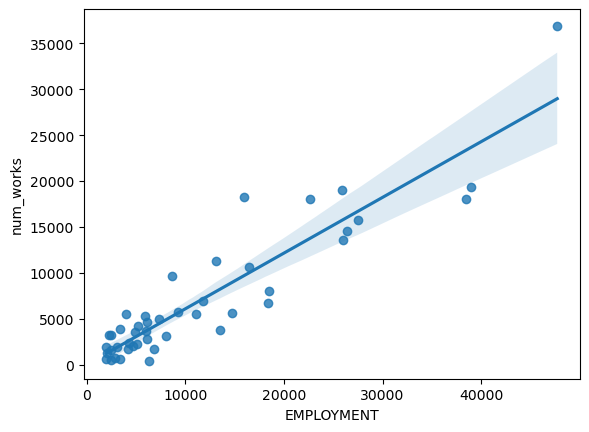

In [25]:
import seaborn as sn
sn.regplot(data =df_work_zones_est, x = 'EMPLOYMENT', y= 'num_works')

In [14]:
df_work_zones_est[df_work_zones_est['EMPLOYMENT']>10000]

,EMPLOYMENT,num_works
DUNAM,,
144,18411.0,6740
351,38946.0,19386
378,14769.0,5601
449,13135.0,11332
505,15977.0,18256
559,26347.0,14607
580,38492.0,18037
581,13501.0,3836
709,27493.0,15785
